Nombre de lignes : 350
Nombre de colonnes : 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB
None
Nombre de doublons : 0
Customer ID                 0
Gen

C:\Users\IdeaPad\AppData\Local\Temp\ipykernel_16932\2593837248.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction Level'].fillna('Neutral', inplace=True)


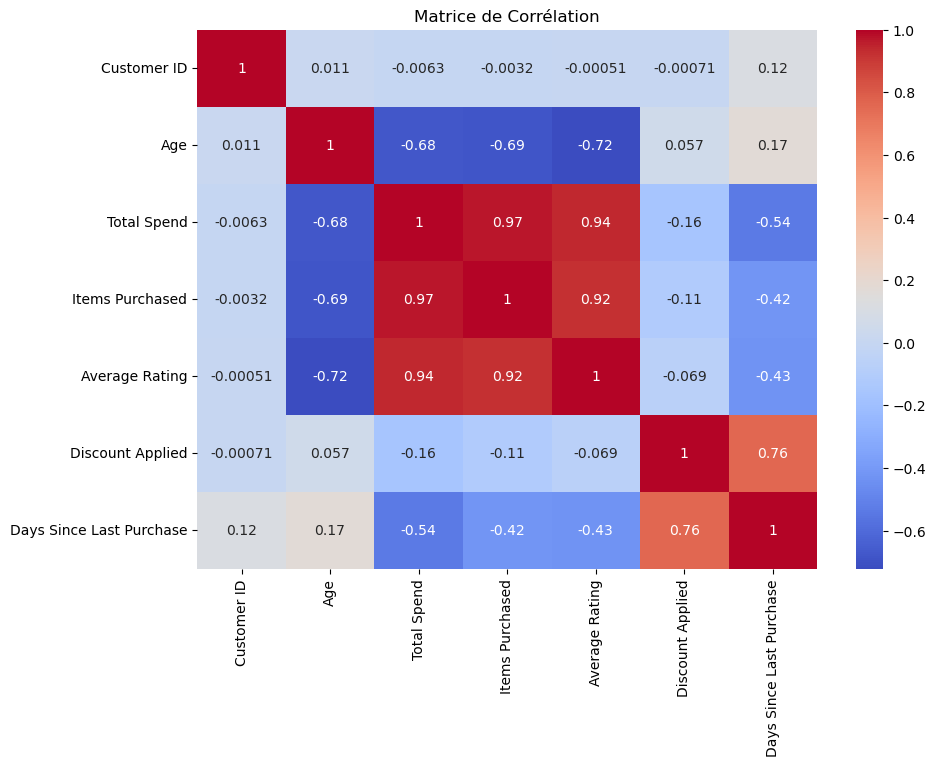

In [4]:
# 📌 1. Introduction
# Ce notebook réalise une analyse exploratoire sur les comportements clients dans un site e-commerce.
# Objectif : identifier les tendances et formuler des recommandations business.

# 📌 2. Importation des librairies et des données

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv(r'C:\Users\IdeaPad\OneDrive\Documenti\mon portefeuille data\Projet_E-commerce Customer Behavior\Ecommerce_User_Analysis\data\e_commerce_Customer_Behavior.csv')

# 📌 3. Exploration des données

print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

print(df.info())

# Vérification des doublons
print("Nombre de doublons :", df.duplicated().sum())

# Valeurs manquantes
print(df.isnull().sum())

# Remplacer les valeurs manquantes de la colonne 'Satisfaction Level' par 'Neutral'
df['Satisfaction Level'].fillna('Neutral', inplace=True)

# 📌 4. Analyse descriptive

# Répartition Genre
print(df['Gender'].value_counts(normalize=True))

# Répartition Ville
print(df['City'].value_counts())

# Dépense moyenne par type de membership
print(df.groupby('Membership Type')['Total Spend'].mean())

# Satisfaction par type de membership
prop_satisfaction = df.groupby(['Membership Type', 'Satisfaction Level']).size() / df.groupby('Membership Type').size()
print(prop_satisfaction)

# 📌 5. Impact des discounts

print(df.groupby('Discount Applied')['Total Spend'].describe())

# 📌 6. Corrélations

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

# Sauvegarde du fichier nettoyé
df.to_csv('customer_data_clean.csv', index=False)

# 📌 7. Conclusions

# - Les clients Gold sont les plus dépensiers et les plus satisfaits.
# - Les discounts ne boostent pas forcément le panier moyen.
# - Les jeunes clients sont les plus actifs et les plus satisfaits.
# - Forte corrélation entre dépenses, nombre d'achats et satisfaction.

